In [1]:
!pip install --upgrade diffusers transformers scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [3]:
import diffusers
import transformers
import scipy
import torch

print(diffusers.__version__)
print(transformers.__version__)
print(scipy.__version__)
print(torch.__version__)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

0.27.2
4.39.2
1.12.0
2.2.1+cu121


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

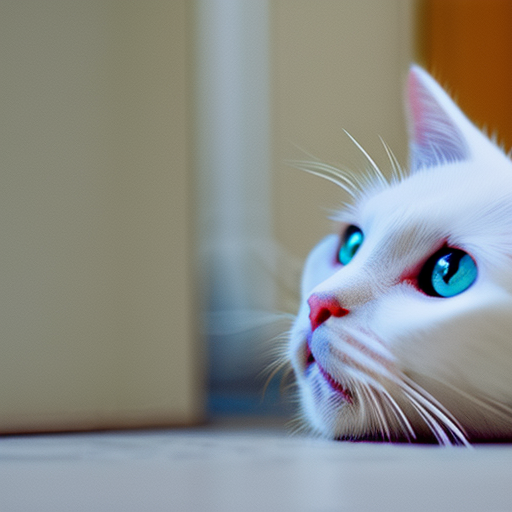

In [4]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "a photo of a white cat"
image = pipe(prompt, height=512, width=512).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

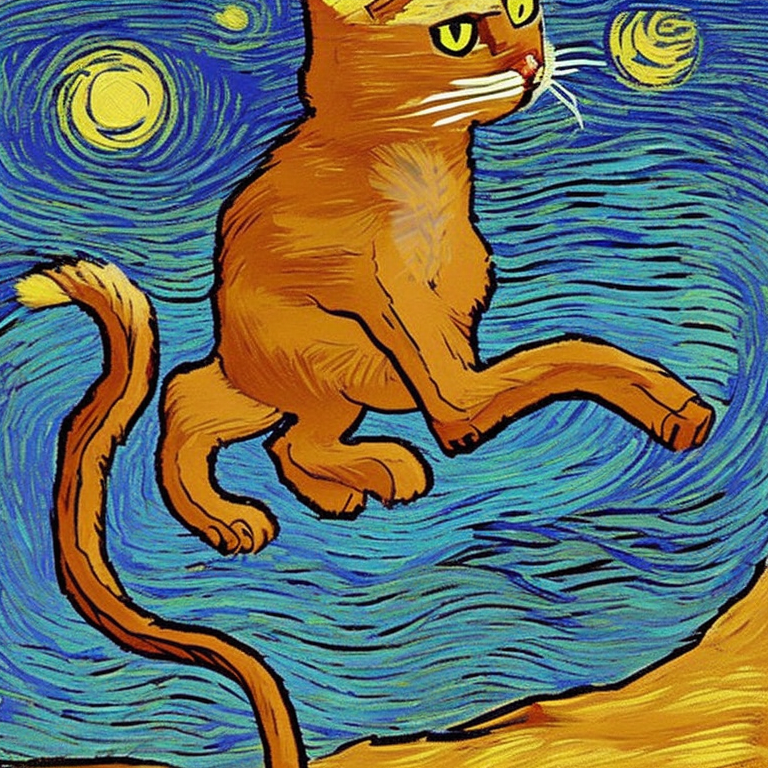

In [5]:
prompt = "a lovely cat running in the desert in Van Gogh style, trending art."
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
image.save(f"lovely_cat.png")
image

  0%|          | 0/50 [00:00<?, ?it/s]

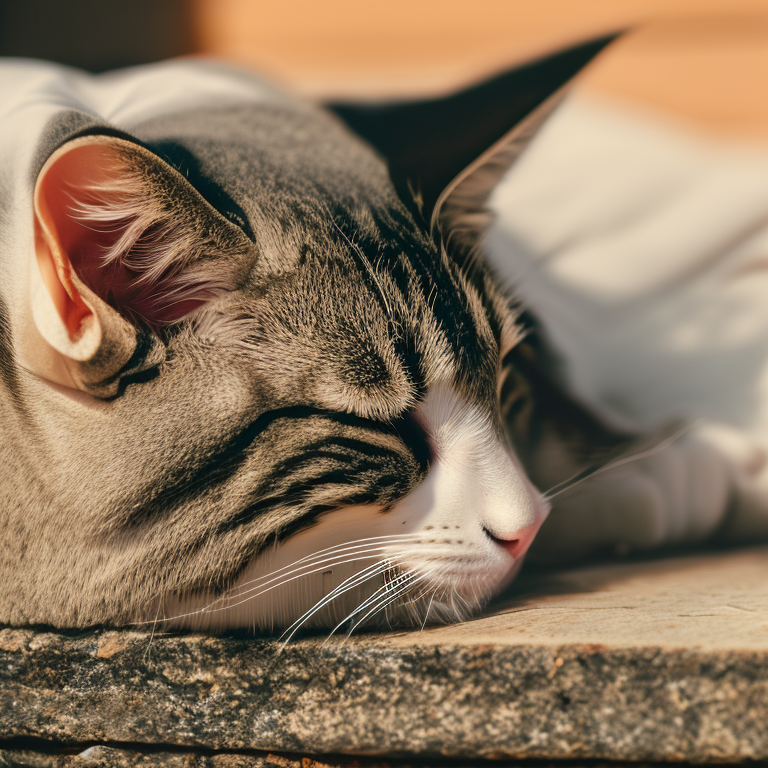

In [8]:
generator = torch.Generator("cuda")

prompt = "a sleeping cat enjoying the sunshine."
image = pipe(prompt, generator=generator).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
image.save(f"lovely_cat_sun.png")
image

  0%|          | 0/50 [00:00<?, ?it/s]

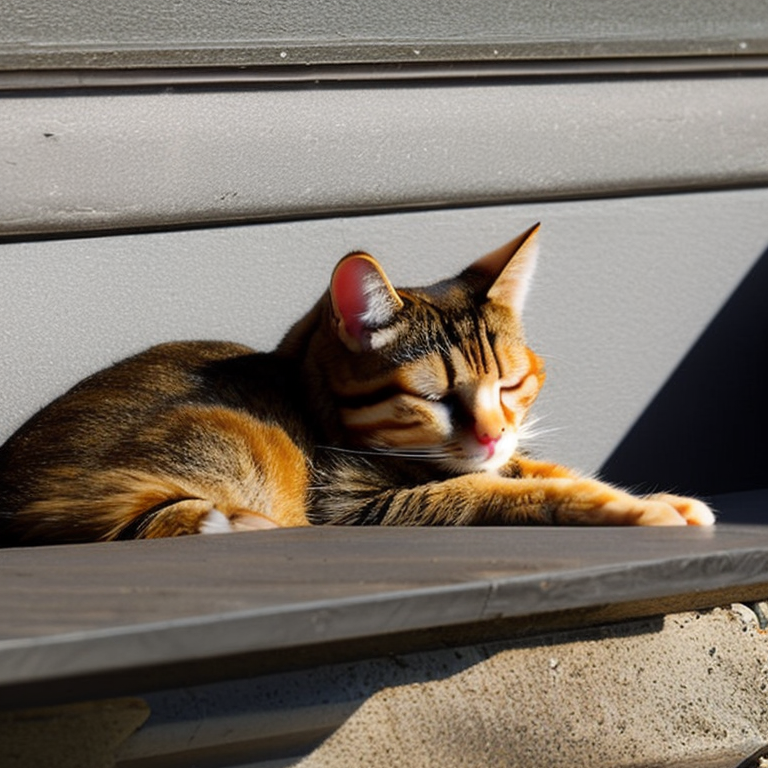

In [7]:
prompt = "a sleeping cat enjoying the sunshine."
image = pipe(prompt, generator=generator,
               negative_prompt="tree and leaves").images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
image.save(f"lovely_cat_sun_no_trees.png")
image

In [22]:
def plt_show_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

<ipython-input-23-8fc05b3aafbc>:51: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  latents_shape = (batch_size, pipe.unet.in_channels, height // 8, width // 8)


  0%|          | 0/50 [00:00<?, ?it/s]

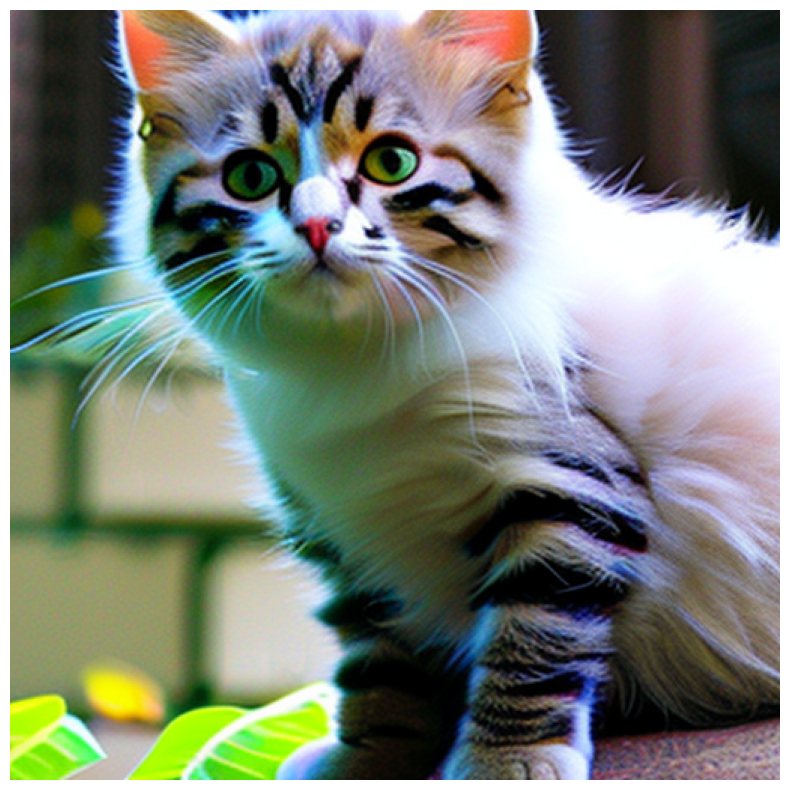

In [23]:
@torch.no_grad()
def generate_simplified(
    prompt = ["a lovely cat"],
    negative_prompt = [""],
    num_inference_steps = 50,
    guidance_scale = 7.5):
    # do_classifier_free_guidance
    batch_size = 1
    height, width = 512, 512
    generator = None
    # here `guidance_scale` is defined analog to the guidance weight `w` of equation (2)
    # of the Imagen paper: https://arxiv.org/pdf/2205.11487.pdf . `guidance_scale = 1`
    # corresponds to doing no classifier free guidance.

    # get prompt text embeddings
    text_inputs = pipe.tokenizer(
        prompt,
        padding="max_length",
        max_length=pipe.tokenizer.model_max_length,
        return_tensors="pt",
    )
    text_input_ids = text_inputs.input_ids
    text_embeddings = pipe.text_encoder(text_input_ids.to(pipe.device))[0]
    bs_embed, seq_len, _ = text_embeddings.shape

    # get negative prompts  text embedding
    max_length = text_input_ids.shape[-1]
    uncond_input = pipe.tokenizer(
        negative_prompt,
        padding="max_length",
        max_length=max_length,
        truncation=True,
        return_tensors="pt",
    )
    uncond_embeddings = pipe.text_encoder(uncond_input.input_ids.to(pipe.device))[0]

    # duplicate unconditional embeddings for each generation per prompt, using mps friendly method
    seq_len = uncond_embeddings.shape[1]
    uncond_embeddings = uncond_embeddings.repeat(batch_size, 1, 1)
    uncond_embeddings = uncond_embeddings.view(batch_size, seq_len, -1)

    # For classifier free guidance, we need to do two forward passes.
    # Here we concatenate the unconditional and text embeddings into a single batch
    # to avoid doing two forward passes
    text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

    # get the initial random noise unless the user supplied it
    # Unlike in other pipelines, latents need to be generated in the target device
    # for 1-to-1 results reproducibility with the CompVis implementation.
    # However this currently doesn't work in `mps`.
    latents_shape = (batch_size, pipe.unet.in_channels, height // 8, width // 8)
    latents_dtype = text_embeddings.dtype
    latents = torch.randn(latents_shape, generator=generator, device=pipe.device, dtype=latents_dtype)

    # set timesteps
    pipe.scheduler.set_timesteps(num_inference_steps)
    # Some schedulers like PNDM have timesteps as arrays
    # It's more optimized to move all timesteps to correct device beforehand
    timesteps_tensor = pipe.scheduler.timesteps.to(pipe.device)
    # scale the initial noise by the standard deviation required by the scheduler
    latents = latents * pipe.scheduler.init_noise_sigma

    # Main diffusion process
    for i, t in enumerate(pipe.progress_bar(timesteps_tensor)):
        # expand the latents if we are doing classifier free guidance
        latent_model_input = torch.cat([latents] * 2)
        latent_model_input = pipe.scheduler.scale_model_input(latent_model_input, t)
        # predict the noise residual
        noise_pred = pipe.unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample
        # perform guidance
        noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
        noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)
        # compute the previous noisy sample x_t -> x_t-1
        latents = pipe.scheduler.step(noise_pred, t, latents, ).prev_sample

    latents = 1 / 0.18215 * latents
    image = pipe.vae.decode(latents).sample
    image = (image / 2 + 0.5).clamp(0, 1)
    # we always cast to float32 as this does not cause significant overhead and is compatible with bfloa16
    image = image.cpu().permute(0, 2, 3, 1).float().numpy()
    return image

image = generate_simplified(
    prompt = ["a lovely cat"],
    negative_prompt = ["Sunshine"],)
plt_show_image(image[0])

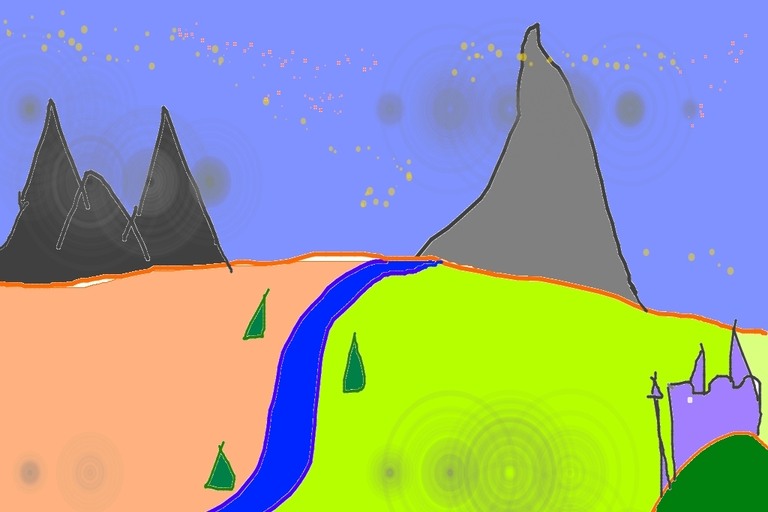

In [24]:
import requests
from io import BytesIO
from PIL import Image

url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_img = Image.open(BytesIO(response.content)).convert("RGB")
init_img = init_img.resize((768, 512))
init_img

In [27]:
from diffusers import StableDiffusionImg2ImgPipeline

In [4]:
from torchvision import transforms as tfms
from diffusers import AutoencoderKL

# Load the autoencoder model which will be used to decode the latents into image space.
vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")
torch_device = "cpu"
# To the GPU we go!
vae = vae.to(torch_device)

# Convert PIL image to latents

def pil_to_latent(input_im):
    # Single image -> single latent in a batch (so size 1, 4, 64, 64)
    with torch.no_grad():
        latent = vae.encode(tfms.ToTensor()(input_im).unsqueeze(0).to(torch_device)*2-1) # Note scaling
    return 0.18215 * latent.latent_dist.sample()

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [5]:
from diffusers import UNet2DConditionModel

# The UNet model for generating the latents.
unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet")

# To the GPU
unet = unet.to(torch_device);
noise_pred = unet(latents, t, encoder_hidden_states=output_embeddings)["sample"]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

NameError: name 'latents' is not defined

In [7]:
from transformers import CLIPTextModel, CLIPTokenizer

# Load the tokenizer and text encoder to tokenize and encode the text.
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")

# To the GPU
text_encoder = text_encoder.to(torch_device)

prompt = 'An astronaut riding a horse'
# Turn the text into a sequnce of tokens:
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
input_ids = text_input.input_ids.to(torch_device)
# Get output embeddings from tokens
output_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]
print('Shape:', output_embeddings.shape)

Shape: torch.Size([1, 77, 768])
